## Principal Component Analysis
---
<img src="./images/biplot1.png" width = "50%" />

[Image Source](http://www.sthda.com/english/sthda-upload/figures/principal-component-methods/006-principal-component-analysis-color-individuals-by-groups-and-variables-by-contributions-1.png)

>- Understanding the need for PCA
>- The statistics of PCA
>- The mathematics of PCA 
>- A basic example

---

<p style="font-size:120%;">Dimensionality reduction by creating new <strong> uncorrelated variables that are linear combination of original variables</strong> and successively maximize variance (minimizing information loss) and also provide interpretability and visulization aid.</p>

In [1]:
from __future__ import print_function
from __future__ import division 

import pandas as pd
import numpy as np
from scipy.sparse.linalg import svds as sparse_svd
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler

from sklearn.datasets import load_boston,load_iris

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sbn


### The statistics of PCA
---
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/400px-Correlation_examples2.svg.png" width="60%" />

[Correlation Coefficients](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/400px-Correlation_examples2.svg.png)

#### Variance (Resource: See Wikipedia for revisiting variance and covariance.)

$$
\begin{align}
\operatorname{var}(X) &= \operatorname{E}\left[(X - \mu)^2 \right]
= \operatorname{E}\left[(X - \operatorname{E}[X])^2\right] \\[4pt]
&= \operatorname{E}\left[X^2 - 2X\operatorname{E}[X] + \operatorname{E}[X]^2\right] \\[4pt]
&= \operatorname{E}\left[X^2\right] - 2\operatorname{E}[X]\operatorname{E}[X] + \operatorname{E}[X]^2 \\[4pt]
&= \operatorname{E}\left[X^2 \right] - \operatorname{E}[X]^2
\end{align}
$$

#### Covariance
$$\large
\operatorname{cov}(X,Y) = \operatorname{E}{\big[(X - \operatorname{E}[X])(Y - \operatorname{E}[Y])\big]}
$$
In other words,
$$
\begin{align} 
\operatorname{cov}(X, Y)
&= \operatorname{E}\left[\left(X - \operatorname{E}\left[X\right]\right) \left(Y - \operatorname{E}\left[Y\right]\right)\right] \\
&= \operatorname{E}\left[X Y - X \operatorname{E}\left[Y\right] - \operatorname{E}\left[X\right] Y + \operatorname{E}\left[X\right] \operatorname{E}\left[Y\right]\right] \\
&= \operatorname{E}\left[X Y\right] - \operatorname{E}\left[X\right] \operatorname{E}\left[Y\right] - \operatorname{E}\left[X\right] \operatorname{E}\left[Y\right] + \operatorname{E}\left[X\right] \operatorname{E}\left[Y\right] \\
&= \operatorname{E}\left[X Y\right] - \operatorname{E}\left[X\right] \operatorname{E}\left[Y\right],
\end{align}
$$

Note that $\operatorname{var}(X) = \operatorname{cov}(X, X).$

Note that two random variables $X$ and $Y$ are uncorrelated when 
$$\operatorname{cov}(X, Y) = 0 \Leftrightarrow E[XY] = E[X]E[Y]$$

#### Correlation coefficient
$$
\rho(X,Y) = \frac{Cov(X,Y)}{\sigma_X \sigma_Y}
$$




#### Basic Properties of Variance
<div class="alert alert-info">

>- $ \operatorname{var}(X)\ge 0.$



>- $ \operatorname{var}(a) = 0.$


>- $ \operatorname{var}(X)= 0 \iff \exists a : P(X=a) = 1.$


>- $ \operatorname{var}(X+a)=\operatorname{var}(X).$


>- $ \operatorname{var}(aX)=a^2\operatorname{var}(X).$


>- $\operatorname{var}(aX+bY)=a^2\operatorname{var}(X)+b^2\operatorname{var}(Y)+2ab\, \operatorname{cov}(X,Y),$


>- $ \operatorname{var}(aX-bY)=a^2\operatorname{var}(X)+b^2\operatorname{var}(Y)-2ab\, \operatorname{cov}(X,Y).$

</div>
<br>

In general, for the sum of $n$ random variables $\{X_1,\dots,X_n\}$:
$$ \operatorname{var}\left(\sum_{i=1}^n X_i\right)=\sum_{i,j=1}^n\operatorname{cov}(X_i,X_j)=\sum_{i=1}^n\operatorname{var}(X_i)+\sum_{i\ne j}\operatorname{cov}(X_i,X_j).$$

Thus the <font color=‘blue’> variance of a linear combination random variables </font>:

$$
\begin{align}
\operatorname{var}\left( \sum_{i=1}^n a_iX_i\right) 
&=\sum_{i,j=1}^{n} a_ia_j\operatorname{cov}(X_i,X_j) \\
&=\sum_{i=1}^n a_i^2\operatorname{var}(X_i)+\sum_{i\not=j}a_ia_j\operatorname{cov}(X_i,X_j)\\
& =\sum_{i=1}^n a_i^2\operatorname{var}(X_i)+2\sum_{1\le i<j\le n}a_ia_j\operatorname{cov}(X_i,X_j) = a^T S a.
\end{align}
$$

Where <font style="color:red;font-size:120%;"> $S$ is the covariance matrix</font>.

$$\Large
\color{blue}{\operatorname{var}(X a) = a^T S\,a.}
$$


The random variables $X_1,\dots,X_n$ are said to be <font style="color:red;font-size:120%;">uncorrelated </font> if 

<br>
$$\operatorname{cov}(X_i,X_j)=0\ ,\ \forall\ (i\ne j)$$
<br>

It follows immediately from the expression given earlier that if the random variables $X_1,\dots,X_n$ are uncorrelated, then

$$\operatorname{var}\left(\sum_{i=1}^n X_i\right)=\sum_{i=1}^n\operatorname{var}(X_i).$$




<br>
**PROBLEM**: Prove that independence implies uncorrelatedness and provide a counterexample to show that uncorrelatedness does not imply independence.



#### Population covariance
$$\large 
\sigma_{jk}=\frac 1 n \sum_{i=1}^n \left(  X_{ij} - \operatorname{E}(X_j)\right)  \left( X_{ik} - \operatorname{E}(X_k)\right)
$$

#### Sample covariance
$$\large
\sigma_{jk}=\frac{1}{n-1}\sum_{i=1}^{n}\left(  X_{ij}-\bar{X}_j \right)  \left( X_{ik}-\bar{X}_k \right),
$$

#### Covariance matrix
$$\Large
\color{blue}{ S = [\sigma_{jk}] = \frac{1}{n-1} [(X-\mu_X)^T(X-\mu_X)]}
$$

where $\mu_X$ is the vector of means of $m$ random vectors denoting the $m$ features of the dataset.



### Mathematics of PCA
---
<font style="color:blue;font-size:120%;"> First Principal Component: </font> Our aim is to find a well-defined linear combination of features that has maximum variance. This boils down to

<div 
style="margin:auto;width:500px;padding:20px;border:3px solid green;border-radius:15px;" >

$$\large \color{blue}{ \operatorname{maximize}\ \  \operatorname{Var}\left( \sum_{i=1}^N a_iX_i\right) = a^T S\, a,   \quad \textrm{such that }\ \ {a^Ta=1}.
}
$$

</div>

Or equivalently, by using <font style="color:red;font-size:120%;">  Lagrange's optimization method </font>(find stationary points)

<div class='eqnbox'>
$$ \large\color{green}{
\mathcal{L}(a,\lambda)  = a^T S\, a - \lambda(a^T a - 1)  \quad \textrm{such that }\ \ {a^Ta=1}.}
$$
</div>

where $\lambda$ is the lagrange multiplier.

---

#### Eigen Decomposition based PCA

[See spectral theorem for orthonormal eigen-decomposition](https://en.wikipedia.org/wiki/Spectral_theorem#Hermitian_maps_and_Hermitian_matrices)

**PROBLEM**: Prove that the vector $a$ could be given by the eigenvector associated with the largest eigenvalue of $S$.

$$\large
\nabla_{a} \mathcal{L}(a,\lambda) = 2Sa - 2\lambda  a = 0
$$

 This implies that $(a,\lambda)$ from an eigen-pair of the covariance matrix. In this case the variance is maximized as
 
 $$\large
 \operatorname{var} (Xa) = a^T S a = a^T \lambda a = \lambda a^T a = \lambda
 $$
 
 by taking $a$ to be the eigenvector corresponding to the largest eigenvalue (which happens to be the variance).
 
 <font style="color:blue;font-size:120%;"> Second Principal Component: </font> 
Next, we plan to find another linear combination $Xb$ that is uncorrelated with $Xa$ and has the largest variance. This need the additional condition that 


$$
\large\operatorname{cov}(Xa, Xb)=b^T S a =b^T(\lambda a) =\lambda b^T a=0,
$$ 


implying that $a$ and $b$ be mutually orthogonal. This means that $b$ could be chosen to be the eigenvector associated with the second eigenvalue in the eigenvector decomposition of $S$.

 <font style="color:blue;font-size:120%;"> Remaining Principal Components: </font> We can continue with the above process to find the $k$-th PCs $X a_k$ where $a_k$ is the eigevector associated with the $k$-th largest eigenvalue of $S$  in the spectral-decomposition of the covariance matrix $S$.
 
 <div class='eqnbox2'>
 $$\large
 \operatorname{var} (X a_k) = a_k^T S a_k = a_k^T \lambda_k a_k = \lambda_k a_k^T a_k = \lambda_k.
 $$
</div>

<div class="alert alert-info">
Geometrically PCA creates a new set of orthogonal bsed on the maximization of the variation in the data where the first axis (PC1) accounts for the maximum variance and so on.
</div>

#### SVD Based PCA

**PROBLEM**: Verify that the eigenvectors of $S$ are <font style="color:blue;font-size:120%;">  the right singular vectors of the column centered data matrix </font> $\tilde{X}$ 

$$
\begin{align}
(n-1)S &= \tilde{X}^T\tilde{X} \\
&= (U\Sigma V^T)^T (U\Sigma V^T)\\
&= V \Sigma^2 V^T\\
\Leftrightarrow (n-1)S V &= V \Sigma^2
\end{align}
$$


<div class="alert alert-warning">
<font style="color:red;font-size:120%;"> PCA of X is equivalent to SVD of column centered $\tilde{X}$. The variance in the two approaches have the following relations: 

<br>

$$
\operatorname{var}(Xa_k) = \lambda_k = \sigma_k^2/(n-1).
$$
</font>
</div>
<br>

### PCA Terminology
---
>- **Principal Components**: The linear combinations $Xa_k$ are called PCs.

>- **PC Loadings**: Elements of the eigenvector $a_k$ are called PC loadings.

>- **PC Scores**:Elemets of $Xa_k$ are called PC scores.

>- **Explained variance ratio**: of a PC $Xa_k$ is
$$
\pi_k = \frac{\lambda_k}{\sum \lambda_i } = \frac{\lambda_k}{trace(S) }
$$

>- **Total explained variance ratio**: of the first $k$ PCs is
$$
\sum_{i=1}^k \pi_i = \frac{\lambda_1+ \cdots+ \lambda_k}{\sum \lambda_i }
$$

#### Cautions
>- Only the relative magnitude and sign patterns of the loadings (and scores) are meaningful.

### Examples: PCA of diabetes data

In [2]:
## PIMA Indian dataset: Has been removed from UCI now but available on Kaggle
## It is available with scikitlearn.datasets
#url = "https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"
col_names = ['preg', 'gtt', 'bp', 'skin', 'test', 'bmi', 'pedi', 'age', 'class'] # Short Names
#df_pima = pd.read_csv("./pima_diabetes.csv", header=0)
df_pima = pd.read_csv("./pima_diabetes.csv", skiprows=1, names=col_names)

In [3]:
df_pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   gtt     768 non-null    int64  
 2   bp      768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   bmi     768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df_pima.head()

,preg,gtt,bp,skin,test,bmi,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# Correlation between features
pima_corr =df_pima.corr()
corr =pima_corr.values

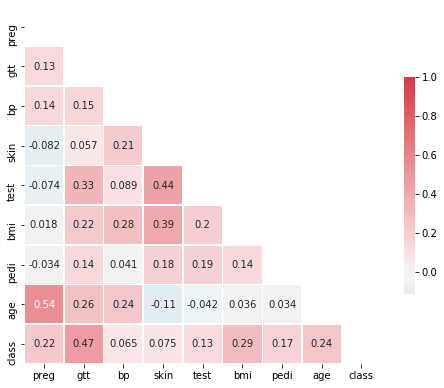

In [6]:
# Correlation between features

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 8))

# Generate a custom diverging colormap
cmap = sbn.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sbn.heatmap(pima_corr, mask=mask, cmap=cmap, vmax=1.0,annot=True, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [7]:
data_mat = df_pima.values
X = data_mat[:,0:8]
Y = data_mat[:,8]

In [8]:
np.set_printoptions(precision=2, suppress=True)
sigmaX = np.std(X,axis=0)
# X = X/sigmaX # If Correlation PCA is required
muX = np.mean(X, axis=0)
n = X.shape[0]-1
print("The size of data set is:", n)
S = np.dot((X - muX).T, (X - muX)) / (n-1)
print('Covariance matrix: \n:')
print(S)

The size of data set is: 767
Covariance matrix: 
:
[[   11.37    13.97     9.23    -4.4    -28.59     0.47    -0.04    21.6 ]
 [   13.97  1023.58    94.55    29.28  1222.53    55.8      1.46    99.21]
 [    9.23    94.55   375.14    64.11   198.64    43.06     0.26    54.59]
 [   -4.4     29.28    64.11   254.81   804.03    49.44     0.97   -21.41]
 [  -28.59  1222.53   198.64   804.03 13298.52   180.01     7.08   -57.22]
 [    0.47    55.8     43.06    49.44   180.01    62.24     0.37     3.36]
 [   -0.04     1.46     0.26     0.97     7.08     0.37     0.11     0.13]
 [   21.6     99.21    54.59   -21.41   -57.22     3.36     0.13   138.48]]


In [9]:
# Eigenvalue Decomposition of S
w, v = np.linalg.eig(S)

#print('Eigenvectors \n%s' %v)
print('\nEigenvalues \n%s' %w)
print('\n Explained Ratio: \n%s' %(w/np.sum(w)))


Eigenvalues 
[13474.14   933.98   391.09   198.44   112.84    45.89     7.77     0.1 ]

 Explained Ratio: 
[0.89 0.06 0.03 0.01 0.01 0.   0.   0.  ]


In [12]:
#SVD based approach
muX = np.mean(X, axis=0)
n = X.shape[0]-1
print("The size of data set is:", n)
U,s,V = np.linalg.svd(X-muX)
#print('Covariance matrix: \n:')
#print(S)
s2 = s**2;
print('\n Singularvalues \n%s' %s)
print('\n Singularvalues *(n-1) \n {}'.format(s**2/(n-1)))
print('\n Explained Ratio: \n%s' %(s2/np.sum(s2)))

The size of data set is: 767

 Singularvalues 
[3212.66  845.83  547.33  389.88  293.99  187.49   77.15    8.88]

 Singularvalues *(n-1) 
 [13474.14   933.98   391.09   198.44   112.84    45.89     7.77     0.1 ]

 Explained Ratio: 
[0.89 0.06 0.03 0.01 0.01 0.   0.   0.  ]


In [17]:
# Instantiate PCA
pca = PCA(n_components=3)
pca.fit((X-muX).T) # Features are the rows in Standard PCA by convention, so we transform

Xpca = pca.transform(X.T)
#print("PCA components: %s") # pca.explained_variance_
#print(pca.components_)
print ("Explained Variance Ratio")
print (pca.explained_variance_ratio_)

Explained Variance Ratio
[0.89 0.06 0.02]


#### Correlation PCA
---
**Question**: Why is standardization of features desirable? What are its effects on PCA?


Correlation PCA is performed on the correlation matrix in place of the covariance matrix.


Correlation PCA is thus the covariance PCA on standardized data where column $X_j$ is standardized as

$$\large
Z_{ij} = \frac{X_{ij} - \bar{X_j}}{s_j}
$$
where $s_j$ is the standard deviation of the j-th column.

<div class="alert alert-block alert-danger">
NOTE that the PCs and explained variance in correlation PCs are not the same as in covariance PCs. 
</div>

In [20]:
# Instantiate PCA
pca = PCA(n_components=8)
muX = np.mean(X, axis=0)
sigmaX = np.std(X,axis=0)
Xn = (X-muX)/sigmaX # One can use the StandardScalar available with ScikitLearn
pca.fit(Xn.T) # Features are the rows, so we transform

Xpca = pca.transform(Xn.T)

#print("PCA components: %s") # pca.explained_variance_
#print(pca.components_)
print ("Explained Variance Ratio")
print (pca.explained_variance_ratio_)

Explained Variance Ratio
[0.29 0.17 0.15 0.13 0.11 0.07 0.07 0.  ]


#### Some Findamental Issues
---
   >- Correlation-based vs. Covariance based PCA
   >- Biplots
   >- Centering
   >- $n < p$
---

#### Adaptations
---
>- Functional PCA
>- Simplified PCA
>- Robust PCA


### Robust PCA
---
**Question**: Do you agree that finding the first-$k$ PCs is equivalent to solving the following problem? Provide your reasoning.

$$\large
\operatorname{minimize}\ \|X-L\|_F,  \textrm{ subject to }\ \operatorname{rank}(L) \leq k.
$$

<div class="alert alert-block alert-warning">
Note: PCA is sensitive to presence of outliers and errors in dataset.
</div>
<font style="color:blue; font-weight:bold;"> Robust Principal Component Analysis </font>: Decomposition as $X \approx L+S$

<div class='eqnbox'>
$$\large
\operatorname{minimize}\ \|L\|_* + \lambda\, \|S\|_1
$$
</div>
where $\|L\|_* = \sigma_1 + \cdots \sigma_r$ is called the nuclear norm of $L$ and $\lambda$ is a penalty parameter.
>- In some applications such as video surveillance, we are interested in 'noise'.


>- Choice of $\lambda = 1/ \sqrt{max(n,\,m)}$ works well, so we can avoid parameter tuning.

>- <font color='green'>Principal component pursuit</font> is a popular method for this optimization. Under certain non-stringent conditions it is possible to find the low-rank and sparse components with high probability. 

[Reading 2](https://arxiv.org/abs/0912.3599) 

#### Question: How does $L_1$ norm induce sparsity? LASSO vs Ridge.
<img src="https://upload.wikimedia.org/wikipedia/commons/f/f8/L1_and_L2_balls.svg" width="80%" />

[Image Source: WikiMedia](https://upload.wikimedia.org/wikipedia/commons/f/f8/L1_and_L2_balls.svg)

**READING: Augmented Lagrangian Method** for solving constrained optimization problems.

[Wikipedia](https://en.wikipedia.org/wiki/Augmented_Lagrangian_method)

#### Example: PCA on Iris data-set
---
<img src="http://suruchifialoke.com/img/ML/iris.png" width="80%">

Adapted from the following sources:[Iris Data Wikipedia](https://en.wikipedia.org/wiki/Iris_flower_data_set)
[1](https://ostwalprasad.github.io/machine-learning/PCA-using-python.html), [2](https://stackoverflow.com/questions/39216897/plot-pca-loadings-and-loading-in-biplot-in-sklearn-like-rs-autoplot)

In [43]:
iris= load_iris()
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
dtypes: float64(4)
memory usage: 4.8 KB


In [44]:
X_iris = StandardScaler().fit_transform(iris.data)

In [45]:
pca_iris = PCA(n_components=4)
pc_iris = pca_iris.fit_transform(X_iris)
pc_iris.shape

(150, 4)

In [46]:
pca_iris.explained_variance_

array([ 2.93035378,  0.92740362,  0.14834223,  0.02074601])

In [47]:
pca_iris.explained_variance_ratio_

array([ 0.72770452,  0.23030523,  0.03683832,  0.00515193])

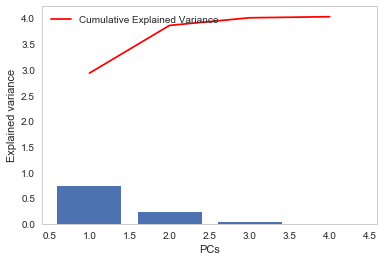

In [51]:
plt.bar(range(1,len(pca_iris.explained_variance_ratio_ )+1),pca_iris.explained_variance_ratio_ )
plt.ylabel('Explained variance')
plt.xlabel('PCs')
plt.plot(range(1,len(pca_iris.explained_variance_ )+1),
         np.cumsum(pca_iris.explained_variance_),
         c='red',
         label="Cumulative Explained Variance")
plt.legend(loc='upper left')

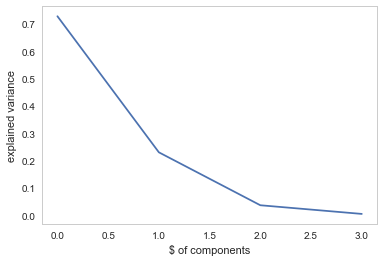

In [52]:
# Scree-plot: #comp vs eigenvalue
plt.plot(pca_iris.explained_variance_ratio_)
plt.xlabel('# of components')
plt.ylabel('explained variance ratio')
plt.show()

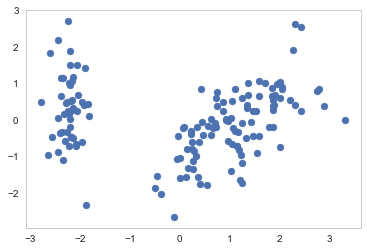

In [31]:
plt.scatter(pc_iris[:, 0], pc_iris[:, 1])

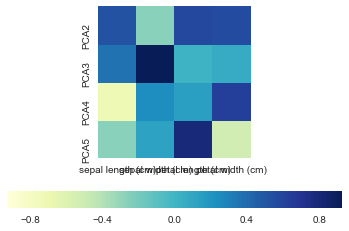

In [53]:
ax = sns.heatmap(pca_iris.components_,
                 cmap='YlGnBu',
                 yticklabels=[ "PCA"+str(x) for x in range(1,pcamodel.n_components_+1)],
                 xticklabels=list(iris.feature_names),
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")

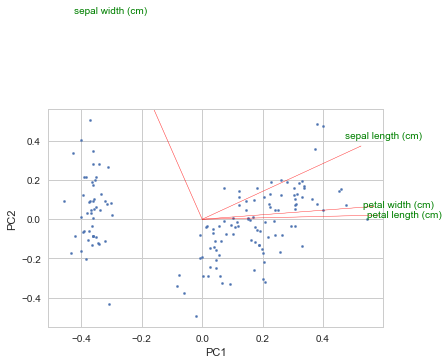

In [40]:
# Biplot

def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,s=5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
 
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()
    
## Never mind, I have been trying this from different sources
def myplot2(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = ys)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

myplot(pc_iris[:,0:2],np.transpose(pca_iris.components_[0:2, :]),list(iris.feature_names))
plt.show()

In [35]:
# Still trying to show the different classes in different colors as in the given picture.
df_pca_iris = pd.DataFrame(pc_iris, 
                           columns = ["PC1", "PC2","PC3","PC4"])
color_list = [{0:"r",1:"g",2:"b"}[x] for x in iris.target_names]

fig, ax = plt.subplots()
ax.scatter(x=pc_iris["PC1"], y=pc_iris["PC2"], color=color_list)

KeyError: 'setosa'

#### Exercise: Perform PCA on automobile data from UCI
---

In [21]:
from sklearn.datasets import load_breast_cancer

In [22]:
bcd = load_breast_cancer()

In [24]:
import pandas as pd

In [26]:
bcd_df = pd.DataFrame(bcd.data,columns=bcd.feature_names)
bcd_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [30]:
ss = StandardScaler()
data_scaled = ss.fit_transform(bcd_df)

In [31]:
pca = PCA(n_components=5)

In [32]:
data_pca = pca.fit_transform(data_scaled)

In [33]:
pca.explained_variance_ratio_

array([0.44, 0.19, 0.09, 0.07, 0.05])

AttributeError: 'numpy.ndarray' object has no attribute 'unique'

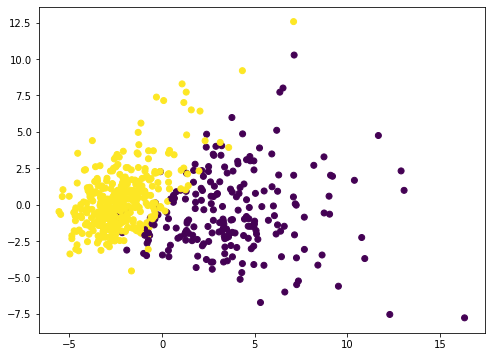

In [43]:
plt.figure(figsize=(8,6))
plt.scatter(data_pca[:,0],data_pca[:,1],c=bcd.target)
plt.legend()
plt.xlabel("PC1")
plt.ylabel("PC2")

In [38]:
bcd.target_names

array(['malignant', 'benign'], dtype='<U9')

In [7]:
%%html
<style>
.eqnbox{
    margin:auto;width:500px;padding:20px;
    border: 3px solid green; border-radius:15px;margin-top:20px;margin-bottom:20px;
}
.eqnbox2{
    margin:auto;width:500px;padding:20px;background-color:#c6d6b4;
    border: 1px solid green; border-radius:15px;margin-top:20px;margin-bottom:20px;
}
</style>